<a href="https://colab.research.google.com/github/ManisankarDey/Yes-bank-stock-closing-price-prediction/blob/main/Yes_bank_stock_closing_price_prediction_by_Manisankar_Dey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Yes bank stock closing price prediction




##### **Project Type**    - **Regression-supervised**
##### **Contribution**    - Individual

**NAME :** MANISANKAR DEY

# **Project Summary -**

Yes Bank is a banking company that was founded in 2004 that offers a wide range of differentiated products for its corporate and retail customers through retail banking and asset management services. It is also a publically traded company. That provides an opportunity for anyone to invest in Yes bank and become a shareholder. But at the same time, it means that the valuation of the company is now in the hands of investors and speculators as share prices are often heavily impacted by public opinion. We have used yes bank stock price data set. This dataset contains 5 different features that can be used for predicting close price prediction using machine learning. We have built machine learning regression model for price prediction. We have used some of best models.



# **GitHub Link -**

https://github.com/ManisankarDey/Yes-bank-stock-closing-price-prediction.git

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.


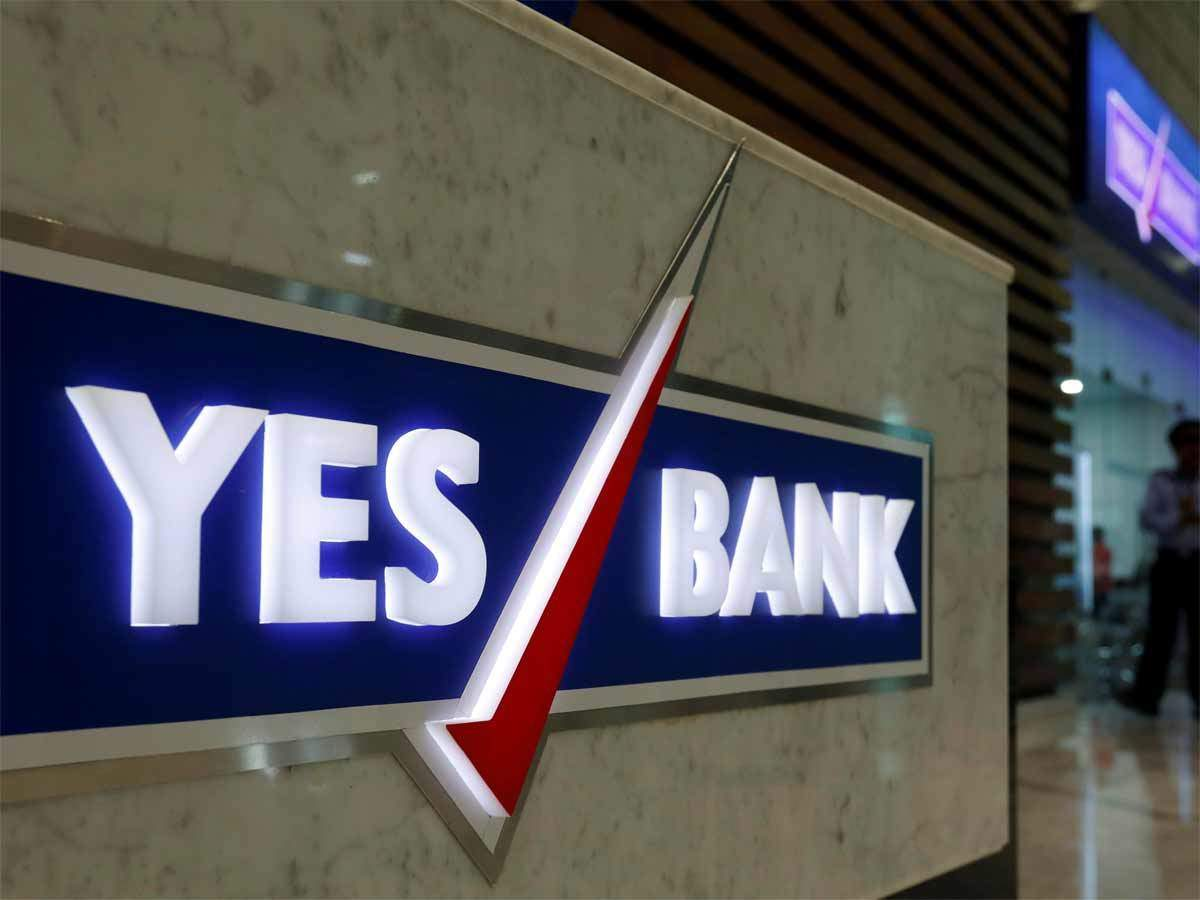

**Project Type - Linear Regression**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np                                                           #numerical computations
import pandas as pd                                                          #to load the data


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns                                                        # for visualization


from sklearn.preprocessing import (MinMaxScaler,StandardScaler)              #scaling the data
from sklearn.model_selection import train_test_split                        # split train and test data

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import (Lasso, Ridge,ElasticNet, LassoCV, RidgeCV, ElasticNetCV)

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset = pd.read_csv('/data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

In [ ]:
dataset

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

In [ ]:
dataset.size

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isnull().sum()

In [ ]:
# Visualizing the missing values
import missingno as msno


msno.bar(dataset,figsize=(6,6))


plt.title('Missing Data bar Plot')
plt.show()

### What did you know about your dataset?

There are 5 columns and 185 records in the given dataset.It includes monthly stock prices from July 2005 to November 2020. Among the 5 columns, 4 are independent variables (Date, open,high,low) and dependent variable(close). There are no duplicate values, null values or missing values in the data. All the independent variables are of float data type except date which is object and need to be converted to datetime.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

In [ ]:
# Dataset Describe
dataset.describe()

### Variables Description

Date - Date of the record. It has monthly dates from July 2005 to November
2020. data type is object need to change into datetime

Open- opening price of the share/stock (Numerical)

High - Highest price of the share for that day (Numerical)

Low - Lowest Price of the share for that day (Numerical)

Close - Closing price of the share for that day (Numerical)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print('unique values in ',i, 'are', dataset[i].nunique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
dataset_copy= dataset.copy()

In [ ]:
dataset_copy.head()

In [ ]:
#converting datatype of Date from string to Datetime

from datetime import datetime

dataset_copy['Date']=pd.to_datetime(dataset_copy['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [ ]:
dataset_copy.head()

In [ ]:
dataset_copy.describe()

In [ ]:
col=dataset_copy.columns.to_list()
numerical_cols=col[1:]
numerical_cols

In [ ]:
for column in numerical_cols:
  plt.figure(figsize=(6,6))
  sns.boxplot(dataset_copy[column],orient='h')
  plt.xlabel(column, fontsize=10)
  plt.show()

In [ ]:
#setting the Date as index.
dataset_copy.set_index('Date', inplace=True)

In [ ]:
dataset_copy.head()

In [ ]:
# seperating the data
independent_variables = dataset_copy.columns.tolist()[:-1]
dependent_variable = ['Close']

print(independent_variables)
print(dependent_variable)

### What all manipulations have you done and insights you found?

I have changed datatype of Date variable to datetime. Remaining all variables are numerical. numerical variables are Open,High, Low and Close(dependent variable). There are no null values and duplicate values. Data is clean and ready for vizualization. Mean is higher in numerical columns which indicate possibility of skewness in the data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1**

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(8,7))
dataset_copy['Close'].plot(color = 'b')

plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price yearly')
plt.show()

##### 1. Why did you pick the specific chart?

To see how closing price in each year.

##### 2. What is/are the insight(s) found from the chart?

form seeing the plot, it is evident that after the fraud case in 2018, the closing price took a huge hit and dropped significantly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, because of the 2018 fraud the yes bank stock has suffered immensily from 2018. That should not happen in the future.

#### **Chart - 2**

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(7,7))
sns.distplot(dataset_copy['Close'],color="b")
plt.title('Distibution of Dependent variable')
plt.xlabel('closing price')

plt.axvline(dataset_copy['Close'].mean(),color='yellow')
plt.axvline(dataset_copy['Close'].median(),color='red',linestyle='dashed')
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of the Dependent variable. distplot gives more accurate result.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that the data is somewhat positively skewed(right skew).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by observing the chart we now know that the closing price will always change over a period of time and that too because of the fraud in 2018, data is skewed positively. transformation need to be applied which will result in better prediction of closing price.


#### **Chart - 3**

In [ ]:
# Chart - 3 visualization code
# Plotting the distributions of Independent features.
plt.figure(figsize=(14, 5))

for i, col in enumerate(independent_variables):
    plt.subplot(1, 3, i+1)
    sns.distplot(dataset_copy[col], color='b')
    plt.xlabel(col, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(dataset_copy[col].mean(), color='yellow')
    plt.axvline(dataset_copy[col].median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of independent variables')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To see the distributions across all independent variables.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that all the independent variables are right skewed and transformation is required



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By observing above chart I came to know that transformation need to be applied on all independent variables which will essentially require for a good model

#### **Chart - 4**

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,8))
correlation = dataset_copy.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

To identify the correlation between variables.

##### 2. What is/are the insight(s) found from the chart?

It is expected that all independent variables are correlated to each other because opening price, high price, low price will not vary much in the finance sector. So, I am going to do feature generation to avoid multicollinearity.



#### Chart - 10 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(dataset_copy)

##### 1. Why did you pick the specific chart?

Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. It gives us in single large picture. This is used essentially to get to know about our data and how our target variable is related with the rest of the variables



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***